In [1]:
from __future__ import print_function
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import io
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
print(len(data.columns))

33


In [9]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
data = data.drop(['id','Unnamed: 32'],axis =1)

In [11]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
data.shape

(569, 31)

In [13]:
print(data.dtypes)

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [14]:
data.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [15]:
print(data.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


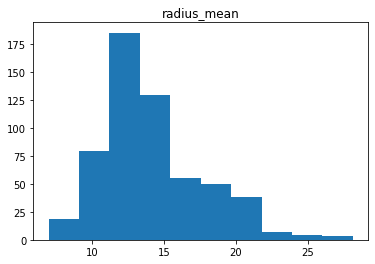

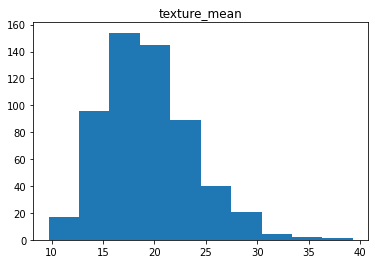

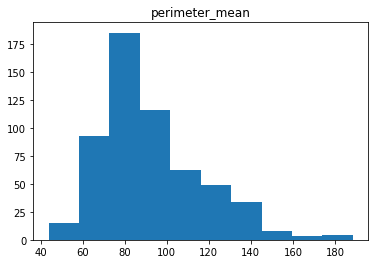

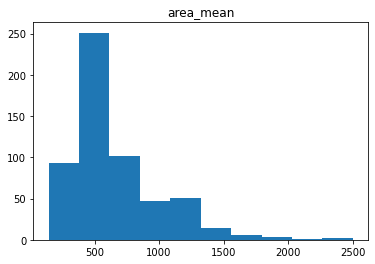

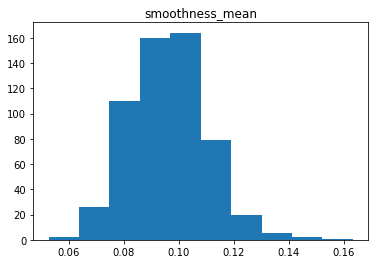

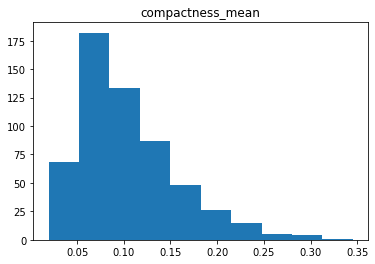

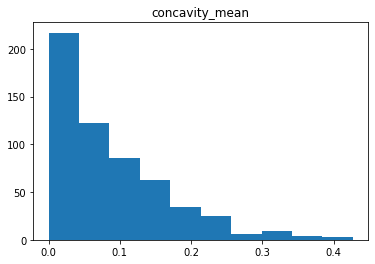

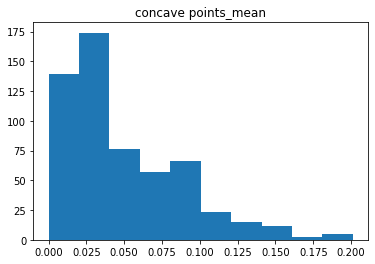

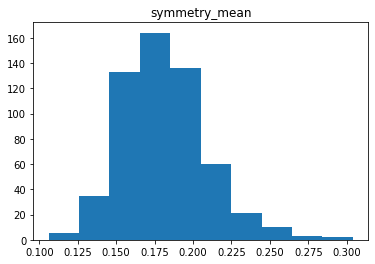

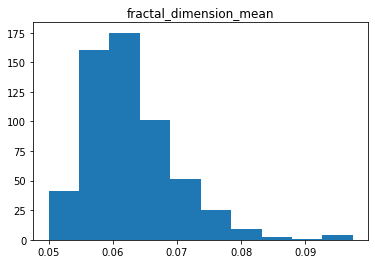

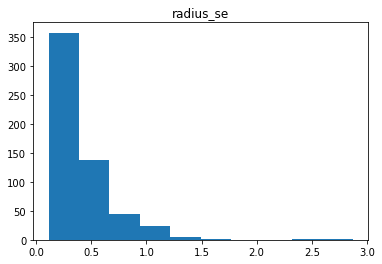

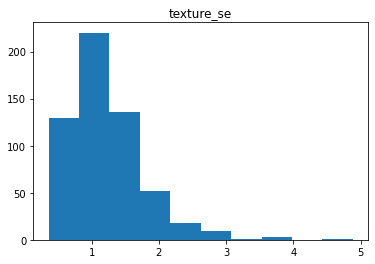

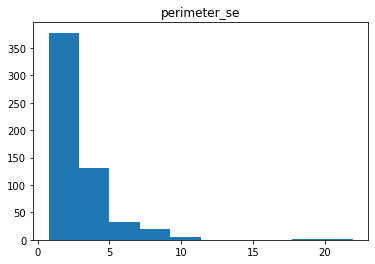

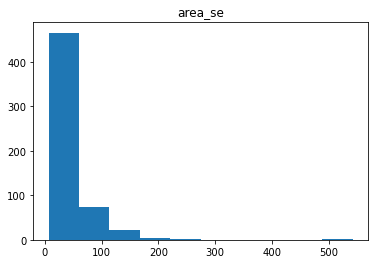

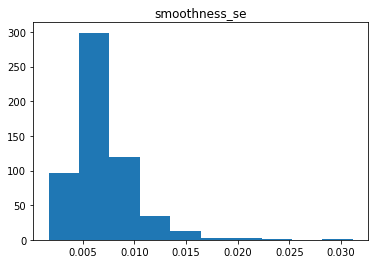

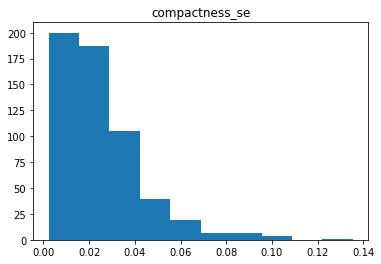

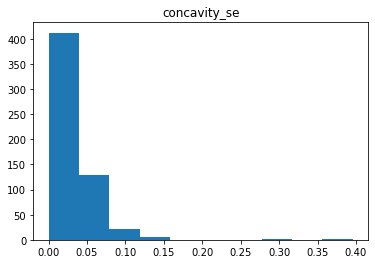

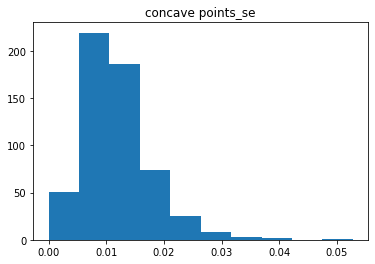

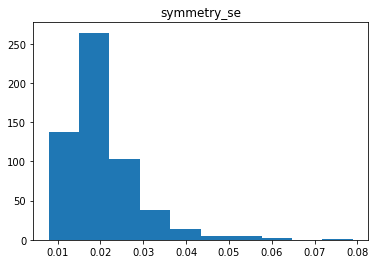

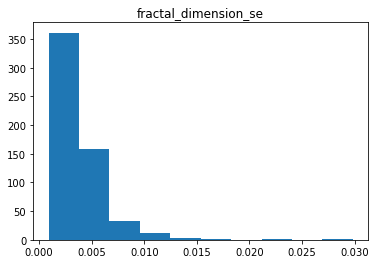

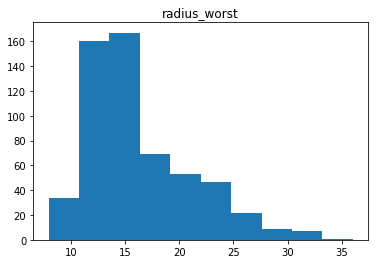

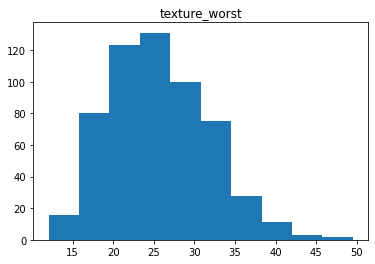

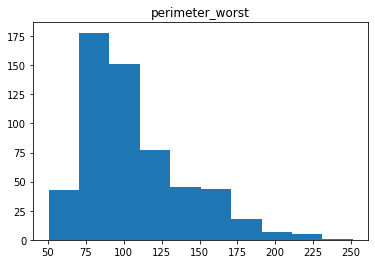

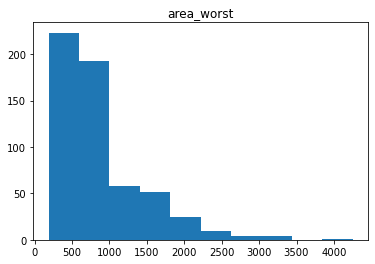

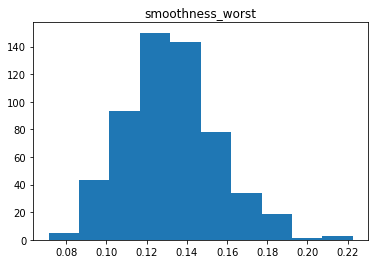

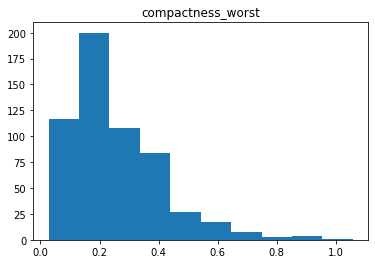

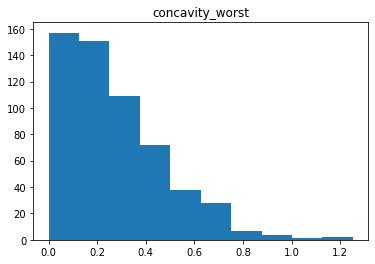

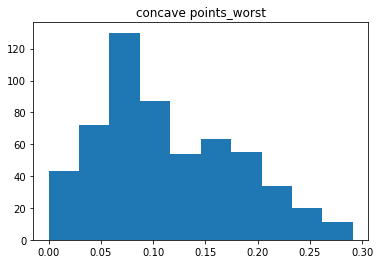

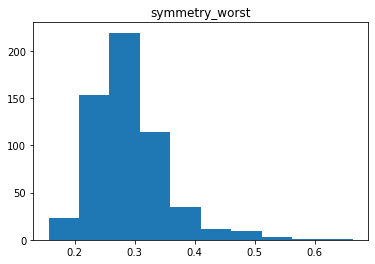

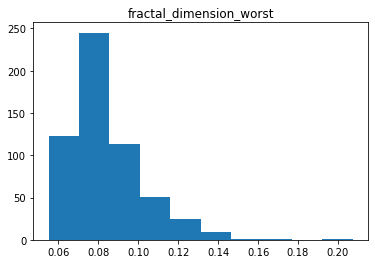

In [17]:
To_plot=data.iloc[:,1:]

for i in To_plot:
    plt.figure()
    plt.title(label=i)
    plt.hist(data[i])
    plt.show()

<AxesSubplot:>

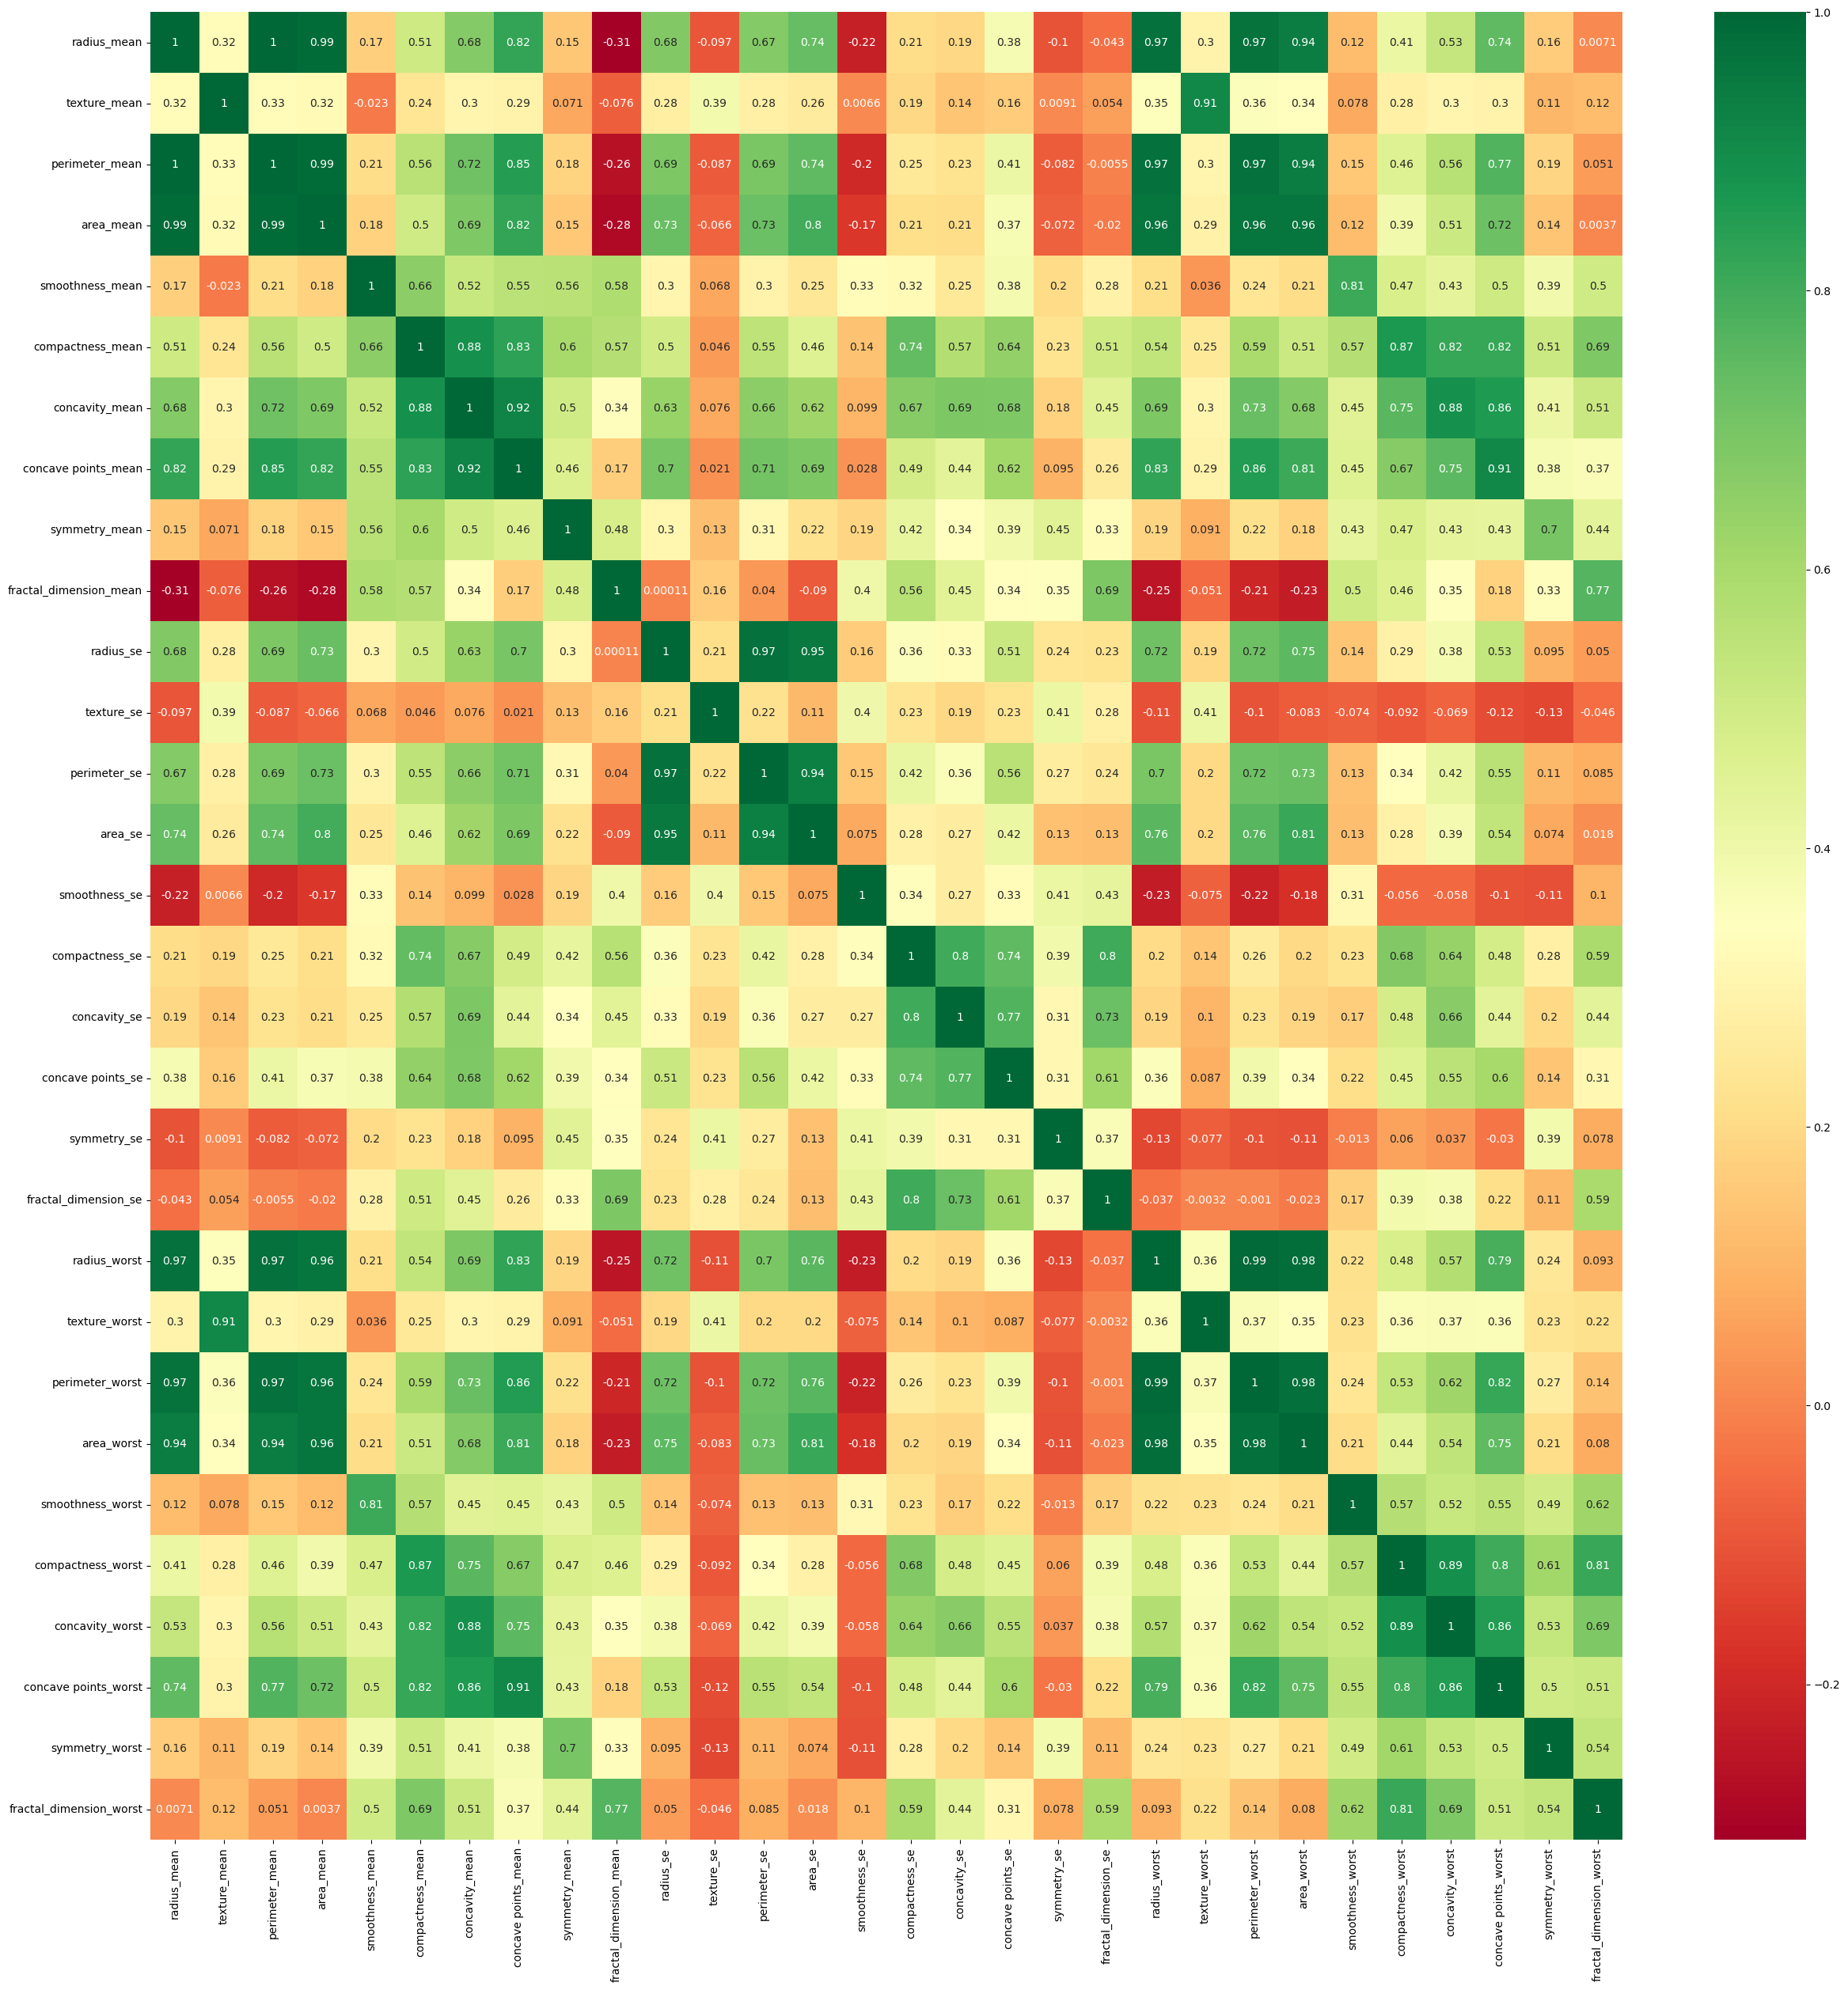

In [16]:
plt.figure(figsize = (30,30))
df = data.iloc[:,1:].corr()
sns.heatmap(df,annot = True,cmap = "RdYlGn")

In [17]:
data = data.iloc[:,:-10]
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


In [18]:
data.shape

(569, 21)

In [19]:
df=data.iloc[:, 1:].clip(lower = data.quantile(0.01), upper = data.quantile(0.99), axis = 1)
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,17.99000,10.9304,122.8000,1001.000,0.118400,0.277192,0.30010,0.14710,0.241900,0.078710,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.01587,0.030030,0.006193
1,20.57000,17.7700,132.9000,1326.000,0.084740,0.078640,0.08690,0.07017,0.181200,0.056670,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.01340,0.013890,0.003532
2,19.69000,21.2500,130.0000,1203.000,0.109600,0.159900,0.19740,0.12790,0.206900,0.059990,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.02058,0.022500,0.004571
3,11.42000,20.3800,77.5800,386.100,0.132888,0.277192,0.24140,0.10520,0.259564,0.085438,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.01867,0.052208,0.009208
4,20.29000,14.3400,135.1000,1297.000,0.100300,0.132800,0.19800,0.10430,0.180900,0.058830,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.01885,0.017560,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56000,22.3900,142.0000,1479.000,0.111000,0.115900,0.24390,0.13890,0.172600,0.056230,1.1760,1.2560,7.673,158.70,0.010300,0.028910,0.05198,0.02454,0.011140,0.004239
565,20.13000,28.2500,131.2000,1261.000,0.097800,0.103400,0.14400,0.09791,0.175200,0.055330,0.7655,2.4630,5.203,99.04,0.005769,0.024230,0.03950,0.01678,0.018980,0.002498
566,16.60000,28.0800,108.3000,858.100,0.084550,0.102300,0.09251,0.05302,0.159000,0.056480,0.4564,1.0750,3.425,48.55,0.005903,0.037310,0.04730,0.01557,0.013180,0.003892
567,20.60000,29.3300,140.1000,1265.000,0.117800,0.277000,0.35140,0.15200,0.239700,0.070160,0.7260,1.5950,5.772,86.22,0.006522,0.061580,0.07117,0.01664,0.023240,0.006185


In [20]:
x = df
data.diagnosis.replace(to_replace=['B', 'M'], value=[0, 1],inplace =True)
y = data.diagnosis

In [21]:
x.shape

(569, 20)

In [22]:
y.shape

(569,)

In [23]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,17.99000,10.9304,122.8000,1001.000,0.118400,0.277192,0.30010,0.14710,0.241900,0.078710,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.01587,0.030030,0.006193
1,20.57000,17.7700,132.9000,1326.000,0.084740,0.078640,0.08690,0.07017,0.181200,0.056670,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.01340,0.013890,0.003532
2,19.69000,21.2500,130.0000,1203.000,0.109600,0.159900,0.19740,0.12790,0.206900,0.059990,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.02058,0.022500,0.004571
3,11.42000,20.3800,77.5800,386.100,0.132888,0.277192,0.24140,0.10520,0.259564,0.085438,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.01867,0.052208,0.009208
4,20.29000,14.3400,135.1000,1297.000,0.100300,0.132800,0.19800,0.10430,0.180900,0.058830,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.01885,0.017560,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56000,22.3900,142.0000,1479.000,0.111000,0.115900,0.24390,0.13890,0.172600,0.056230,1.1760,1.2560,7.673,158.70,0.010300,0.028910,0.05198,0.02454,0.011140,0.004239
565,20.13000,28.2500,131.2000,1261.000,0.097800,0.103400,0.14400,0.09791,0.175200,0.055330,0.7655,2.4630,5.203,99.04,0.005769,0.024230,0.03950,0.01678,0.018980,0.002498
566,16.60000,28.0800,108.3000,858.100,0.084550,0.102300,0.09251,0.05302,0.159000,0.056480,0.4564,1.0750,3.425,48.55,0.005903,0.037310,0.04730,0.01557,0.013180,0.003892
567,20.60000,29.3300,140.1000,1265.000,0.117800,0.277000,0.35140,0.15200,0.239700,0.070160,0.7260,1.5950,5.772,86.22,0.006522,0.061580,0.07117,0.01664,0.023240,0.006185


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [26]:
feature_label = x.columns

In [27]:
feature_label

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

In [28]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
forest.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [29]:
feature_imp = forest.feature_importances_

In [30]:
feature_imp

array([0.07470093, 0.0307569 , 0.14074137, 0.10707431, 0.01686833,
       0.03021107, 0.15399232, 0.16194496, 0.00995442, 0.00952338,
       0.02683791, 0.00778083, 0.04075518, 0.11134246, 0.00923844,
       0.00823743, 0.01709225, 0.01821712, 0.00980128, 0.01492912])

In [21]:
feature_scores = pd.Series(feature_imp, index=x_train.columns).sort_values(ascending=False)
feature_scores

perimeter_mean            0.165348
concave points_mean       0.163190
concavity_mean            0.147965
area_mean                 0.099039
radius_mean               0.089593
area_se                   0.081195
texture_mean              0.050610
compactness_mean          0.035934
perimeter_se              0.031601
radius_se                 0.027459
smoothness_mean           0.016540
fractal_dimension_se      0.013315
concave points_se         0.012357
compactness_se            0.012267
concavity_se              0.011930
symmetry_se               0.010276
symmetry_mean             0.010067
fractal_dimension_mean    0.008297
smoothness_se             0.006640
texture_se                0.006379
dtype: float64

In [31]:
x_train = x_train.drop(['smoothness_se','texture_se'], axis=1)
x_test = x_test.drop(['smoothness_se','texture_se'], axis=1)

In [32]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
491,17.850,13.23,114.60,992.1,0.07838,0.06217,0.04445,0.04178,0.129508,0.05243,0.4834,3.163,50.95,0.008274,0.011530,0.007437,0.01302,0.001309
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.211300,0.07115,0.4030,3.123,41.51,0.037180,0.061650,0.010510,0.01591,0.005099
331,12.980,19.35,84.52,514.0,0.09579,0.11250,0.07107,0.02950,0.176100,0.06540,0.2684,2.465,20.65,0.032550,0.043930,0.009811,0.02751,0.004572
416,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.01257,0.202500,0.06601,0.4302,2.759,25.17,0.016740,0.013670,0.008674,0.03044,0.004590
235,14.030,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.01896,0.151700,0.05835,0.2589,1.667,22.07,0.013830,0.007302,0.010040,0.01263,0.002925


In [33]:
x_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
421,14.69,13.98,98.22,656.1,0.103100,0.183600,0.14500,0.063000,0.208600,0.074060,0.5462,4.795,49.45,0.052440,0.052780,0.015800,0.026530,0.005444
326,14.11,12.88,90.03,616.5,0.093090,0.053060,0.01765,0.027330,0.137300,0.057000,0.2571,1.558,23.92,0.011320,0.005717,0.006627,0.014160,0.002476
534,10.96,17.62,70.79,365.6,0.096870,0.097520,0.05263,0.027880,0.161900,0.064080,0.1507,1.165,10.09,0.033780,0.044010,0.013460,0.013220,0.003534
3,11.42,20.38,77.58,386.1,0.132888,0.277192,0.24140,0.105200,0.259564,0.085438,0.4956,3.445,27.23,0.074580,0.056610,0.018670,0.052208,0.009208
285,12.58,18.40,79.83,489.0,0.083930,0.042160,0.00186,0.002924,0.169700,0.058550,0.2719,1.721,22.45,0.008008,0.001860,0.002924,0.025710,0.002015


In [34]:
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train)
x_test_scaled = std_scaler.fit_transform(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(x_train_scaled,y_train)

LogisticRegression(random_state=0)

In [40]:
forest = RandomForestClassifier(random_state = 0)
forest.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [41]:
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)

AdaBoostClassifier()

In [42]:
gradboost = GradientBoostingClassifier()
gradboost.fit(x_train, y_train)

GradientBoostingClassifier()

In [43]:
xgboost = XGBClassifier()
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [44]:
from sklearn import metrics

In [45]:
y_insample = log_reg.predict(x_train)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

In [47]:
acc_insample = accuracy_score(y_train,y_insample)
auc_insample = roc_auc_score(y_train, y_insample)
f1_insample = f1_score(y_train, y_insample)
precision_insample = precision_score(y_train,y_insample)
recall_insample = recall_score(y_train, y_insample)

In [48]:
insample_log = pd.DataFrame([['logistic_reg',acc_insample,auc_insample,f1_insample,precision_insample,recall_insample]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
insample_log

,Model,Accuracy,AUC,F1,Precision,Recall
0,logistic_reg,0.362637,0.5,0.532258,0.362637,1.0


In [49]:
y_insample_knn = knn.predict(x_train)

In [50]:
acc_insample_knn = accuracy_score(y_train,y_insample_knn)
auc_insample_knn = roc_auc_score(y_train, y_insample_knn)
f1_insample_knn = f1_score(y_train, y_insample_knn)
precision_insample_knn = precision_score(y_train,y_insample_knn)
recall_insample_knn = recall_score(y_train, y_insample_knn)

In [51]:
insample_knn = pd.DataFrame([['KNN',acc_insample_knn,auc_insample_knn,f1_insample_knn,precision_insample_knn,recall_insample_knn]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
insample_knn

,Model,Accuracy,AUC,F1,Precision,Recall
0,KNN,0.925275,0.916562,0.895706,0.906832,0.884848


In [52]:
y_insample_forest = forest.predict(x_train)

In [53]:
acc_insample_forest = accuracy_score(y_train,y_insample_forest)
auc_insample_forest = roc_auc_score(y_train, y_insample_forest)
f1_insample_forest = f1_score(y_train, y_insample_forest)
precision_insample_forest = precision_score(y_train,y_insample_forest)
recall_insample_forest = recall_score(y_train, y_insample_forest)

In [54]:
insample_forest = pd.DataFrame([['Random Forest',acc_insample_forest,auc_insample_forest,f1_insample_forest,precision_insample_forest,recall_insample_forest]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
insample_forest

,Model,Accuracy,AUC,F1,Precision,Recall
0,Random Forest,1.0,1.0,1.0,1.0,1.0


In [55]:
y_insample_ada = adaboost.predict(x_train)

In [56]:
acc_insample_ada = accuracy_score(y_train,y_insample_ada)
auc_insample_ada = roc_auc_score(y_train, y_insample_ada)
f1_insample_ada = f1_score(y_train, y_insample_ada)
precision_insample_ada = precision_score(y_train,y_insample_ada)
recall_insample_ada = recall_score(y_train, y_insample_ada)

In [57]:
insample_ada = pd.DataFrame([['Adaboost',acc_insample_ada,auc_insample_ada,f1_insample_ada,precision_insample_ada,recall_insample_ada]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
insample_ada

,Model,Accuracy,AUC,F1,Precision,Recall
0,Adaboost,1.0,1.0,1.0,1.0,1.0


In [58]:
y_insample_gradboost = gradboost.predict(x_train)

In [59]:
acc_insample_grad = accuracy_score(y_train,y_insample_gradboost)
auc_insample_grad = roc_auc_score(y_train, y_insample_gradboost)
f1_insample_grad = f1_score(y_train, y_insample_gradboost)
precision_insample_grad = precision_score(y_train,y_insample_gradboost)
recall_insample_grad = recall_score(y_train, y_insample_gradboost)

In [60]:
insample_grad = pd.DataFrame([['Gradient boost',acc_insample_grad,auc_insample_grad,f1_insample_grad,precision_insample_grad,recall_insample_grad]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
insample_grad

,Model,Accuracy,AUC,F1,Precision,Recall
0,Gradient boost,1.0,1.0,1.0,1.0,1.0


In [61]:
y_insample_xgboost = xgboost.predict(x_train)

In [62]:
acc_insample_xgb = accuracy_score(y_train,y_insample_xgboost)
auc_insample_xgb = roc_auc_score(y_train, y_insample_xgboost)
f1_insample_xgb = f1_score(y_train, y_insample_xgboost)
precision_insample_xgb = precision_score(y_train,y_insample_xgboost)
recall_insample_xgb = recall_score(y_train, y_insample_xgboost)

In [63]:
insample_xgb = pd.DataFrame([['XGBoost',acc_insample_xgb,auc_insample_xgb,f1_insample_xgb,precision_insample_xgb,recall_insample_xgb]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
insample_xgb

,Model,Accuracy,AUC,F1,Precision,Recall
0,XGBoost,1.0,1.0,1.0,1.0,1.0


In [64]:
models = ['KNN', 'Logistic Regression', 'Random Forest','AdaBoost', 'GradientBoosting', 'XGBoost']

In [65]:
accuracy = [acc_insample_knn,acc_insample,acc_insample_forest,acc_insample_ada,acc_insample_grad,acc_insample_xgb]
roc_auc = [auc_insample_knn,auc_insample,auc_insample_forest,auc_insample_ada,auc_insample_grad,auc_insample_xgb]
f1 = [f1_insample_knn,f1_insample,f1_insample_forest,f1_insample_ada,f1_insample_grad,f1_insample_xgb]
Precision = [precision_insample_knn,precision_insample,precision_insample_forest,precision_insample_ada,precision_insample_grad,precision_insample_xgb]
Recall = [recall_insample_knn,recall_insample,recall_insample_forest,recall_insample_ada,recall_insample_grad,recall_insample_xgb]

In [66]:
d = {'Accuracy':accuracy,'AUC': roc_auc,'F1':f1,'Precision':Precision,'Recall':Recall}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

,Accuracy,AUC,F1,Precision,Recall
KNN,0.925275,0.916562,0.895706,0.906832,0.884848
Logistic Regression,0.362637,0.500000,0.532258,0.362637,1.000000
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
AdaBoost,1.000000,1.000000,1.000000,1.000000,1.000000
GradientBoosting,1.000000,1.000000,1.000000,1.000000,1.000000
XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
y_lr = log_reg.predict(x_test)

In [68]:
acc_lr = accuracy_score(y_test,y_lr)
auc_lr = roc_auc_score(y_test, y_lr)
f1_lr = f1_score(y_test, y_lr)
precision_lr = precision_score(y_test,y_lr)
recall_lr = recall_score(y_test, y_lr)

In [69]:
log = pd.DataFrame([['logistic_reg',acc_lr,auc_lr,f1_lr,precision_lr,recall_lr]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
log

,Model,Accuracy,AUC,F1,Precision,Recall
0,logistic_reg,0.412281,0.5,0.583851,0.412281,1.0


In [70]:
y_knn = knn.predict(x_test)

In [71]:
acc_knn = accuracy_score(y_test,y_knn)
auc_knn = roc_auc_score(y_test, y_knn)
f1_knn = f1_score(y_test, y_knn)
precision_knn = precision_score(y_test,y_knn)
recall_knn = recall_score(y_test, y_knn)

In [72]:
knn_model = pd.DataFrame([['knn',acc_knn,auc_knn,f1_knn,precision_knn,recall_knn]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
knn_model

,Model,Accuracy,AUC,F1,Precision,Recall
0,knn,0.903509,0.886154,0.870588,0.973684,0.787234


In [73]:
y_forest = forest.predict(x_test)

In [74]:
acc_forest = accuracy_score(y_test,y_forest)
auc_forest = roc_auc_score(y_test, y_forest)
f1_forest = f1_score(y_test, y_forest)
precision_forest = precision_score(y_test,y_forest)
recall_forest = recall_score(y_test, y_forest)

In [75]:
random_forest_model = pd.DataFrame([['random forest',acc_forest,auc_forest,f1_forest,precision_forest,recall_forest]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
random_forest_model

,Model,Accuracy,AUC,F1,Precision,Recall
0,random forest,0.921053,0.913782,0.901099,0.931818,0.87234


In [76]:
y_ada = adaboost.predict(x_test)

In [77]:
acc_ada = accuracy_score(y_test,y_ada)
auc_ada = roc_auc_score(y_test, y_ada)
f1_ada = f1_score(y_test, y_ada)
precision_ada = precision_score(y_test,y_ada)
recall_ada = recall_score(y_test, y_ada)

In [78]:
adaboost_model = pd.DataFrame([['adaboost',acc_ada,auc_ada,f1_ada,precision_ada,recall_ada]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
adaboost_model

,Model,Accuracy,AUC,F1,Precision,Recall
0,adaboost,0.938596,0.928708,0.921348,0.97619,0.87234


In [79]:
y_grad = gradboost.predict(x_test)

In [80]:
acc_grad = accuracy_score(y_test,y_grad)
auc_grad = roc_auc_score(y_test, y_grad)
f1_grad = f1_score(y_test, y_grad)
precision_grad = precision_score(y_test,y_grad)
recall_grad = recall_score(y_test, y_grad)

In [81]:
gradboost_model = pd.DataFrame([['gradboost',acc_grad,auc_grad,f1_grad,precision_grad,recall_grad]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
gradboost_model

,Model,Accuracy,AUC,F1,Precision,Recall
0,gradboost,0.903509,0.902032,0.884211,0.875,0.893617


In [82]:
y_xgboost = xgboost.predict(x_test)

In [83]:
acc_xgb = accuracy_score(y_test,y_xgboost)
auc_xgb = roc_auc_score(y_test, y_xgboost)
f1_xgb = f1_score(y_test, y_xgboost)
precision_xgb = precision_score(y_test,y_xgboost)
recall_xgb = recall_score(y_test, y_xgboost)

In [84]:
xgboost_model = pd.DataFrame([['xgboost',acc_xgb,auc_xgb,f1_xgb,precision_xgb,recall_xgb]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
xgboost_model

,Model,Accuracy,AUC,F1,Precision,Recall
0,xgboost,0.947368,0.939346,0.933333,0.976744,0.893617


In [85]:
models = ['KNN', 'Logistic Regression', 'Random Forest','AdaBoost', 'GradientBoosting', 'XGBoost']

accuracy_mspe = [acc_knn,acc_lr,acc_forest,acc_ada,acc_grad,acc_xgb]
roc_auc_mspe = [auc_knn,auc_lr,auc_forest,auc_ada,auc_grad,auc_xgb]
f1_mspe = [f1_knn,f1_lr,f1_forest,f1_ada,f1_grad,f1_xgb]
Precision_mspe = [precision_knn,precision_lr,precision_forest,precision_ada,precision_grad,precision_xgb]
Recall_mspe = [recall_knn,recall_lr,recall_forest,recall_ada,recall_grad,recall_xgb]

In [86]:
dic = {'Accuracy':accuracy_mspe,'AUC': roc_auc_mspe,'F1':f1_mspe,'Precision':Precision_mspe,'Recall':Recall_mspe}
metrics_table = pd.DataFrame(dic, index = models)
metrics_table

,Accuracy,AUC,F1,Precision,Recall
KNN,0.903509,0.886154,0.870588,0.973684,0.787234
Logistic Regression,0.412281,0.500000,0.583851,0.412281,1.000000
Random Forest,0.921053,0.913782,0.901099,0.931818,0.872340
AdaBoost,0.938596,0.928708,0.921348,0.976190,0.872340
GradientBoosting,0.903509,0.902032,0.884211,0.875000,0.893617
XGBoost,0.947368,0.939346,0.933333,0.976744,0.893617


In [87]:
x_full = x.drop(['smoothness_se','texture_se'], axis=1)

In [88]:
from sklearn.model_selection import GridSearchCV

In [79]:
cv_params = {'max_depth': [3,4,5,6,7,8,9,10],
             'min_child_weight': [1,2,3,4],
             'learning_rate': [0.1,0.2,0.3,0.4],
             'n_estimators': [100,200,300,400,500]}

In [80]:
csv = GridSearchCV(XGBClassifier(), cv_params, scoring = 'recall', cv=4)

In [81]:
csv.fit(x_full,y)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [82]:
csv.best_params_

{'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 100}

In [83]:
xgboost_optimized = XGBClassifier(eta=0.2, max_depth = 4, n_estimators = 100)
xgboost_optimized.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.2,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.200000003,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

In [84]:
y_xgb_Predict = xgboost_optimized.predict(x_test)

In [85]:
acc_xgb_opt = accuracy_score(y_test,y_xgb_Predict)
auc_xgb_opt = roc_auc_score(y_test, y_xgb_Predict)
f1_xgb_opt = f1_score(y_test, y_xgb_Predict)
precision_xgb_opt = precision_score(y_test,y_xgb_Predict)
recall_xgb_opt = recall_score(y_test, y_xgb_Predict)

In [86]:
recall_score(y_test, y_xgb_Predict)

0.8863636363636364

In [87]:
roc_auc_score(y_test, y_xgb_Predict)

0.9217532467532468

In [88]:
xgboost_opt_model = pd.DataFrame([['xgboost Optimized',acc_xgb_opt,auc_xgb_opt,f1_xgb_opt,precision_xgb_opt,recall_xgb_opt]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
xgboost_opt_model

,Model,Accuracy,AUC,F1,Precision,Recall
0,xgboost Optimized,0.929825,0.921753,0.906977,0.928571,0.886364


In [89]:
import joblib

In [90]:
joblib.dump(xgboost_optimized, 'xgboost_optimized.joblib')

['xgboost_optimized.joblib']

In [ ]:
# joblib.load('xgboost_optimized.joblib')